In [57]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
crash_data_df = pd.read_csv('G:\\USA\\Masters\\Graduate\\Courses\\CS 510 Data Engg\\Class_Assignments\\Week4\\CrashData.csv')
vehicle_data_df = pd.read_csv('G:\\USA\\Masters\\Graduate\\Courses\\CS 510 Data Engg\\Class_Assignments\\Week4\\VehicleData.csv')
participant_data_df = pd.read_csv('G:\\USA\\Masters\\Graduate\\Courses\\CS 510 Data Engg\\Class_Assignments\\Week4\\ParticipantData.csv')

In [59]:
# Validate existence assertion: Every crash has highway number as 26
crash_data_highway_no_col = crash_data_df['Highway Number']
for highway_number in crash_data_highway_no_col:
    assert highway_number == 26

In [60]:
# Validate limit assertion: The weekday code for each crash is between 1 to 7
crash_data_week_day_col = crash_data_df['Week Day Code']
for week_day_code in crash_data_week_day_col:
    assert week_day_code > 0 and week_day_code < 8

In [61]:
# Validate intra-record assertion: If a crash record has a special jurisdiction then it should also have jurisdiction group
crash_data_special_jurisdiction_col = crash_data_df['Special Jurisdiction']
crash_data_jurisdiction_group_col = crash_data_df['Jurisdiction Group']
counter = 0
for special_jurisdiction in crash_data_special_jurisdiction_col:
    if math.isnan(float(special_jurisdiction)) == False:
        assert crash_data_jurisdiction_group_col[counter] is not None or math.isnan(float(crash_data_jurisdiction_group_col[counter])) == False
    counter += 1
    

In [62]:
# Validate inter-record assertion: Every participant mentioned in the data is part of a known crash
crash_data_crash_id_col = crash_data_df['Crash ID']
crash_data_crash_id_int_col = [eval(str(crash_id_str)) for crash_id_str in crash_data_crash_id_col]
participant_data_crash_id_col = participant_data_df['Crash ID']
participant_data_participant_id_col = participant_data_df['Participant ID']
counter = 0
for participant_id in participant_data_participant_id_col:
    assert participant_id is not None
    assert crash_data_crash_id_int_col.index(int(participant_data_crash_id_col[counter])) is not None    
    counter += 1

In [63]:
# Validate summary assertion: All the crash ids are unique
crash_id_list = []
for crash_id in crash_data_crash_id_int_col:
    assert crash_id not in crash_id_list
    crash_id_list.append(crash_id)
assert len(crash_data_crash_id_int_col) == len(crash_id_list)

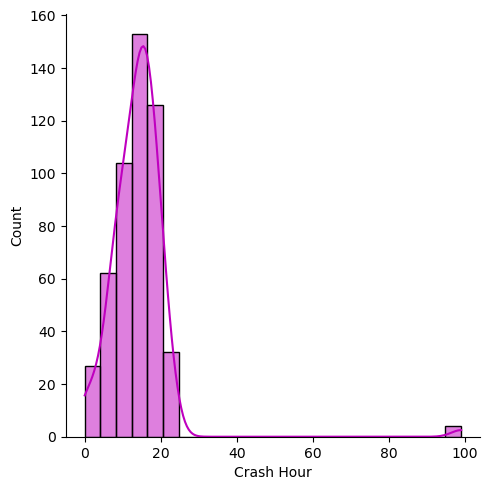

In [64]:
# Validate statistical distribution assertion: Crashes are not evenly distributed throughout the day
crash_data_crash_hour_col = crash_data_df['Crash Hour']
ax = sns.displot(crash_data_crash_hour_col, kde=True, rug=False, color='m', bins = 24)
plt.show()